Explo :

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

data_path = "FR_youtube_trending_data.csv"

yt_data = pd.read_csv(data_path,index_col="video_id")
print("size",yt_data.size)
print("shape",yt_data.shape)
print("dimension",yt_data.ndim)




size 1292865
shape (86191, 15)
dimension 2


In [2]:
print(yt_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 86191 entries, 7rlwxSPUcQk to wXXrva-0-t4
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              86191 non-null  object
 1   publishedAt        86191 non-null  object
 2   channelId          86191 non-null  object
 3   channelTitle       86191 non-null  object
 4   categoryId         86191 non-null  int64 
 5   trending_date      86191 non-null  object
 6   tags               86191 non-null  object
 7   view_count         86191 non-null  int64 
 8   likes              86191 non-null  int64 
 9   dislikes           86191 non-null  int64 
 10  comment_count      86191 non-null  int64 
 11  thumbnail_link     86191 non-null  object
 12  comments_disabled  86191 non-null  bool  
 13  ratings_disabled   86191 non-null  bool  
 14  description        85336 non-null  object
dtypes: bool(2), int64(5), object(8)
memory usage: 9.4+ MB
None


In [3]:
yt_data['title'].value_counts()

Starlink Mission                                                                                       33
Soso Maness - Petrouchka (Clip officiel) ft. PLK                                                       18
Les champions du monde de beatbox nous font un blindtest et c’est (insérer adjectif tel « génial »)    16
Koba LaD - Tue ça Feat. SDM, Guy2bezbar (clip officiel)                                                15
ISK - Chez nous ft. UZI (Clip officiel)                                                                15
                                                                                                       ..
💬Une faille importante détectée dans l'assistant Google !                                               1
Covid-19 : la troisième vague pire que la deuxième dans les services de réanimation                     1
Star Wars: The Bad Batch | Official Trailer | Disney+                                                   1
🎁 BOUTIQUE FORTNITE du 28 Mars 2021 ! Code : P

Plusieurs video revienne souvent ou reste en tendance plusieurs semaine de suite

In [4]:
yt_data['channelId'].value_counts()

UCfj4kQ6_mYO5r4hzX5KloVw    916
UCAcAnMF0OrCtUep3Y4M-ZPw    582
UCo3i0nUzZjjLuM7VjAVz4zA    511
UCQsH5XtIc9hONE1BQjucM0g    496
UCWeg2Pkate69NFdBeuRFTAw    468
                           ... 
UCQRELbX0H5FCokIFxOAsHFA      1
UCI_CtKP-BGonMuIn-y3U5VQ      1
UC7tdFNggH_jwjJTDWqYelmA      1
UChW2w0ss4g4el0h4Ki8mBoQ      1
UCfx-zJb69563vi-yLGhKwew      1
Name: channelId, Length: 3443, dtype: int64

Des chaines sont régulièrement en tendances

16 columns
86191 rows

<AxesSubplot:>

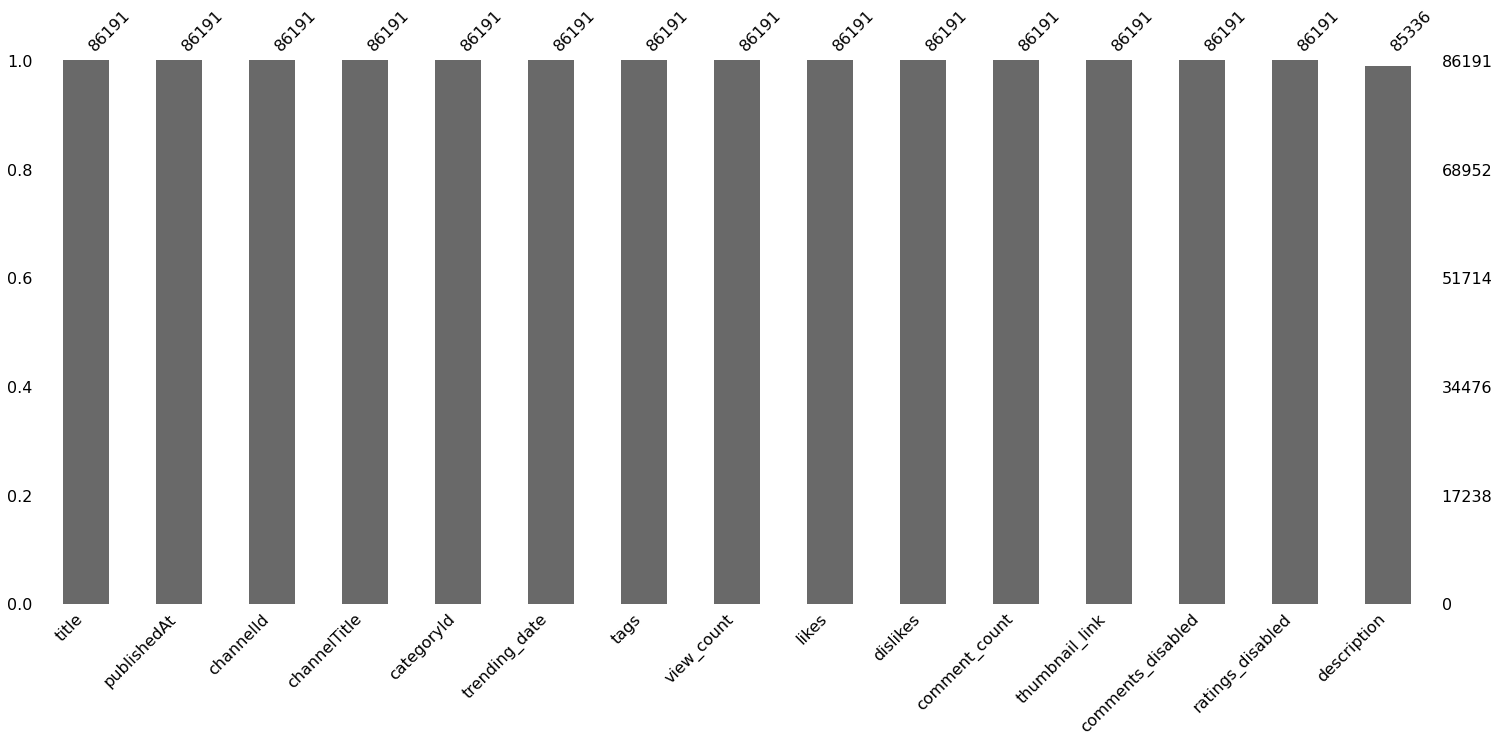

In [5]:
msno.bar(yt_data)

<AxesSubplot:>

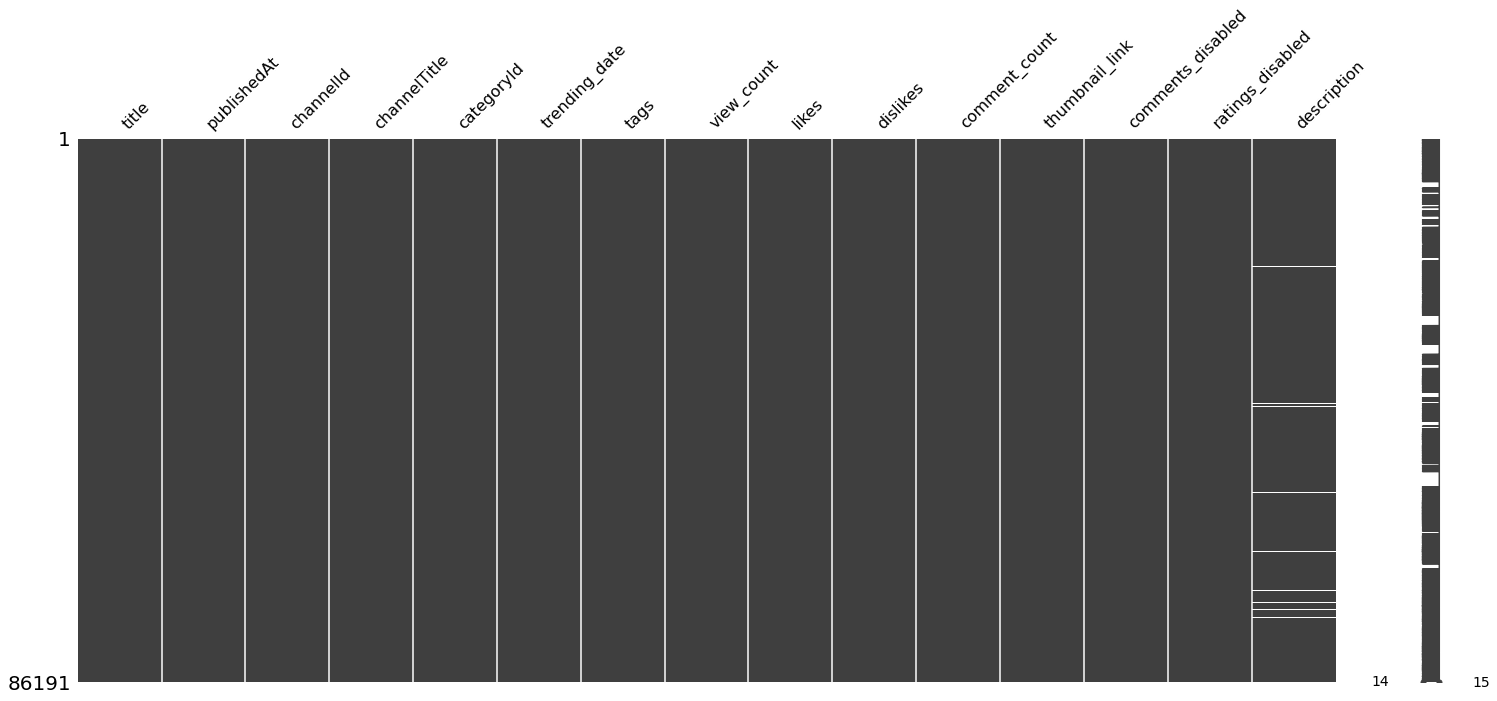

In [6]:
msno.matrix(yt_data)

We can see that there is no paterns of missing data, the category where there are nones are the descriptions but they are not necessary to post a video

<AxesSubplot:>

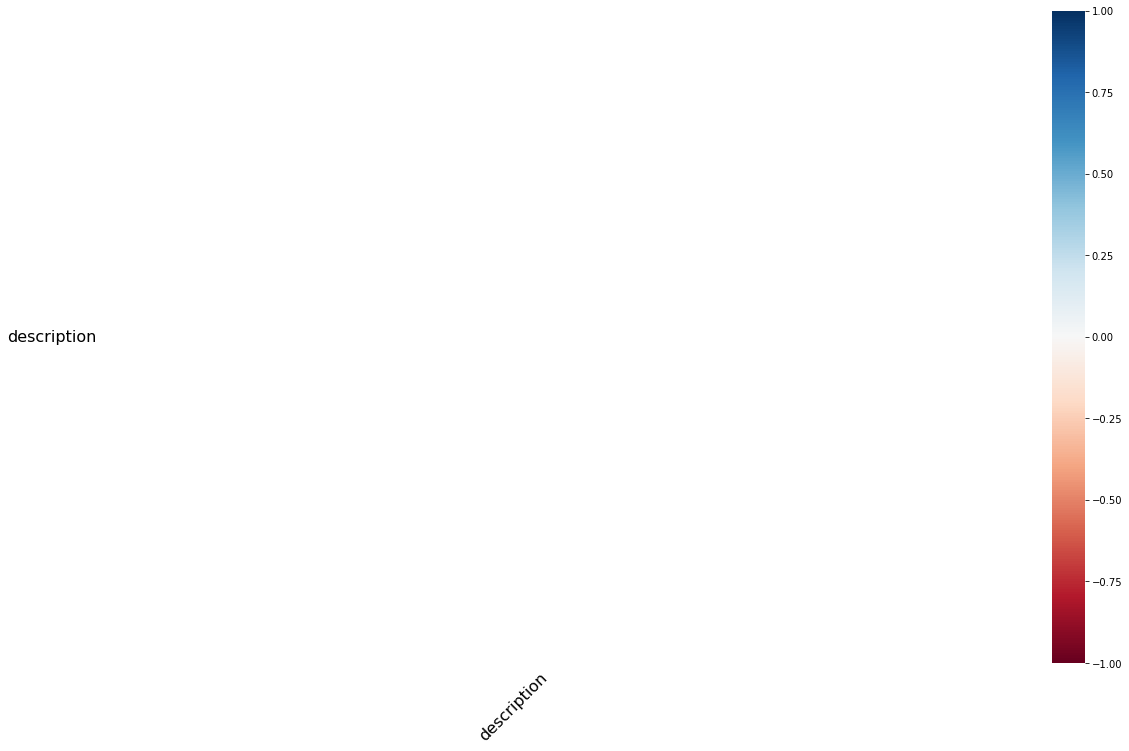

In [7]:
msno.heatmap(yt_data)

<AxesSubplot:>

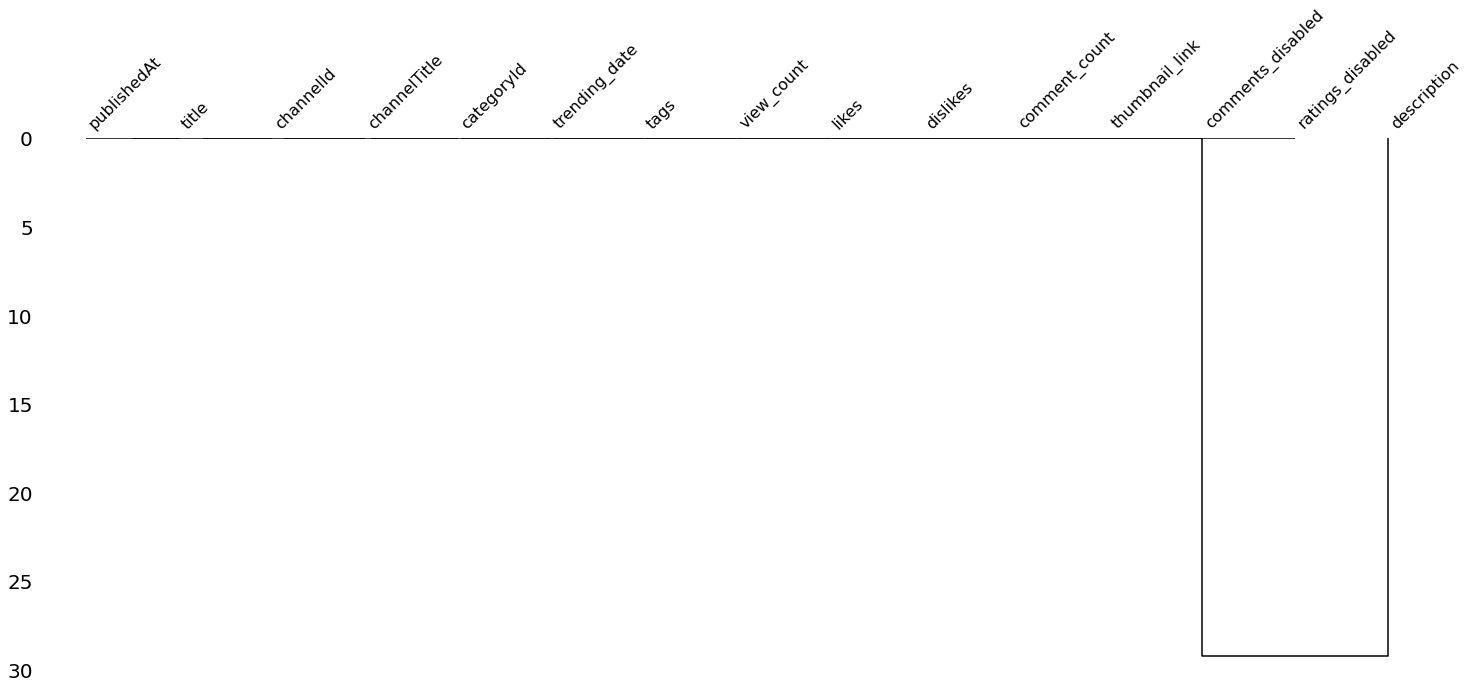

In [8]:
msno.dendrogram(yt_data)

In [9]:
import json

jsonfile = open('FR_category_id.json')
categories = json.load(jsonfile)
category_list = []
for i in categories['items']:
    snippet = i.get('snippet')
    title = snippet.get('title')
    category_list.append(title)
print(category_list)
    

FileNotFoundError: [Errno 2] No such file or directory: 'FR_category_id.json'

Categories = ['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']

In [ ]:
%matplotlib inline
yt_data.hist(bins=50)

In [ ]:
yt_data.plot(kind='bar',x='categoryId',y='view_count')

insight on the most viewed categories

In [ ]:
#yt_data.plot(figsize=(40, 30),kind='scatter',x='publishedAt',y='view_count')

In [ ]:
"""
from datetime import datetime
from datetime import date
date = yt_data['publishedAt'][0]
print(date)
only_date = date[:10]
date_time_obj = datetime.strptime(only_date, '%Y-%m-%d')
print(date_time_obj.weekday())
"""

In [ ]:
from datetime import datetime
from datetime import date

def get_day_of_the_week(date):
    only_date = date[:10]
    date_time_obj = datetime.strptime(only_date, '%Y-%m-%d')
    weekday = date_time_obj.weekday()
    return weekday

In [ ]:
print(yt_data['publishedAt'][0])
print(get_day_of_the_week(yt_data['publishedAt'][0]))

In [ ]:
yt_data['publishedAt'] = yt_data['publishedAt'].apply(lambda x: get_day_of_the_week(x)) 
views_per_day = yt_data.groupby('publishedAt')['view_count'].sum()
print(views_per_day)



In [ ]:
views_per_day.plot.bar()
plt.title('Views per day of the week')
plt.xlabel('Days of the week')
plt.ylabel('Views')
plt.show()

In [ ]:
views_per_day = {}
weekday_view_count={'monday': 0,'tuesday':0,'wednesday':0,'thursday':0,'friday':0,'saturday':0,'sunday':0}
count = 0
weekdays = [0,1,2,3,4,5,6]
for i,date in enumerate(yt_data['publishedAt']):
    only_date = date[:10]
    date_time_obj = datetime.strptime(only_date, '%Y-%m-%d')
    week_day = date_time_obj.weekday()
    
    for weekday in weekdays:
        
        if week_day == weekday:
            vid_view = yt_data['view_count'][i]
            count += vid_view
            weekday_view_count['monday'] = count
print(weekday_view_count)